<a href="https://colab.research.google.com/github/Rodrigo-Antonio-Silva/DataScienceProject/blob/main/ProgLinearSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [249]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
% matplotlib inline



In [250]:
from sklearn.datasets import load_boston
boston_datasets = load_boston()

In [251]:
boston = pd.DataFrame(boston_datasets.data, columns=boston_datasets.feature_names)

In [252]:
boston ['MEV'] = boston_datasets.target

## ENTENDIMENTO DOS DADOS


In [253]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [254]:
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [255]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b90460d10>]],
      dtype=object)

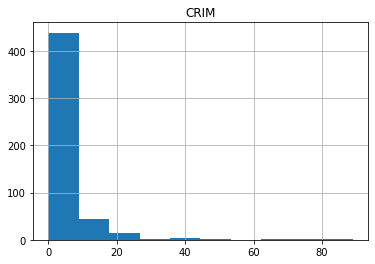

In [256]:
boston.hist(column='CRIM')

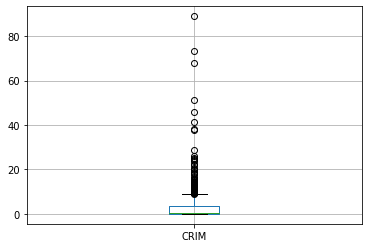

In [257]:
boston.boxplot(column='CRIM')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b9032a050>]],
      dtype=object)

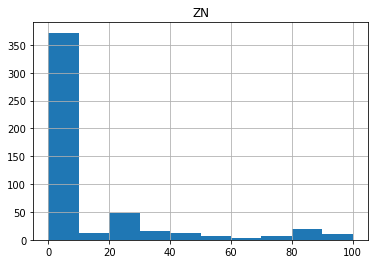

In [258]:
boston.hist(column='ZN')

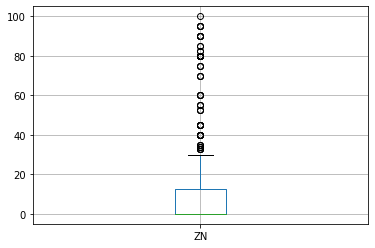

In [259]:
boston.boxplot(column='ZN')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b9022aa90>]],
      dtype=object)

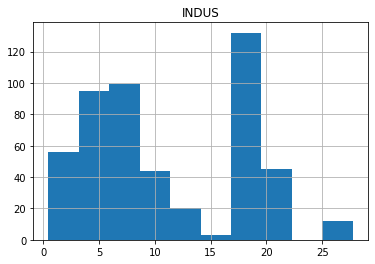

In [260]:
boston.hist(column='INDUS')

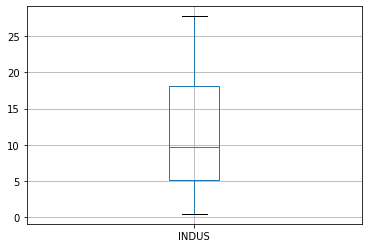

In [261]:
boston.boxplot(column='INDUS')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b90128950>]],
      dtype=object)

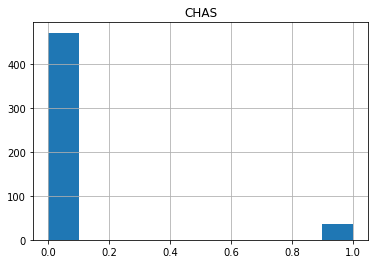

In [262]:
boston.hist('CHAS')

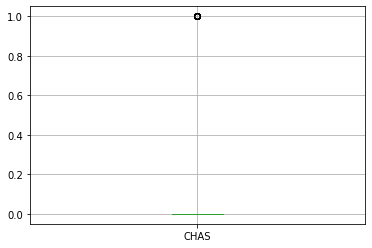

In [263]:
boston.boxplot('CHAS')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b9009a210>]],
      dtype=object)

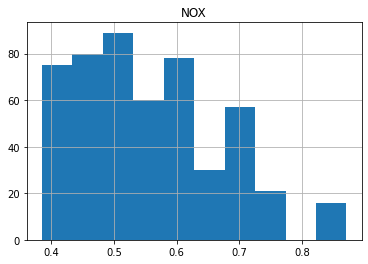

In [264]:
boston.hist('NOX')

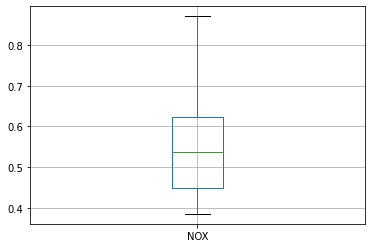

In [265]:
boston.boxplot('NOX')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b8ffe5910>]],
      dtype=object)

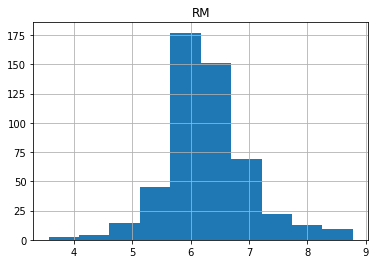

In [266]:
boston.hist('RM')

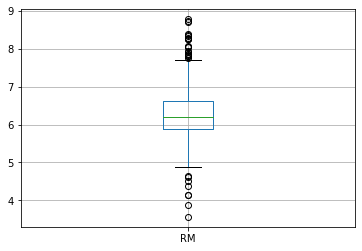

In [267]:
boston.boxplot('RM')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b8fe7b210>]],
      dtype=object)

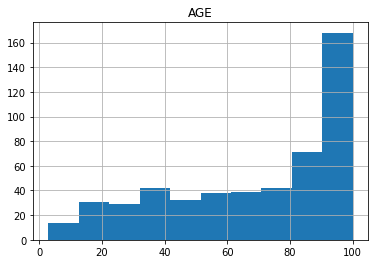

In [268]:
boston.hist('AGE')

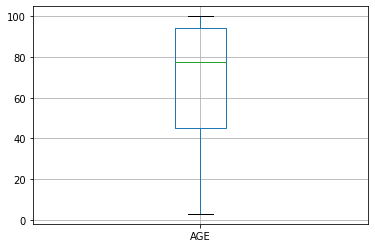

In [269]:
boston.boxplot('AGE')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b8fd7c910>]],
      dtype=object)

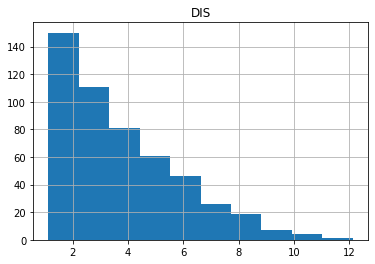

In [270]:
boston.hist('DIS')

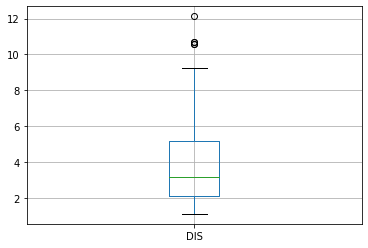

In [271]:
boston.boxplot('DIS')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b8fc7ff10>]],
      dtype=object)

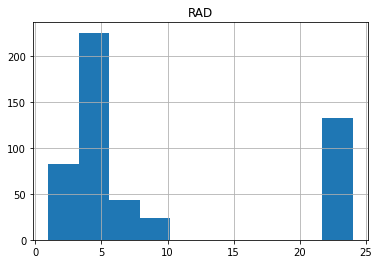

In [272]:
boston.hist('RAD')

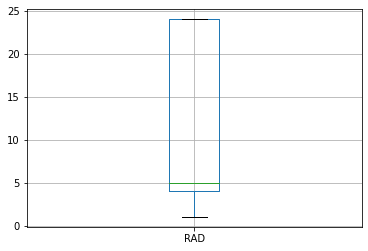

In [273]:
boston.boxplot('RAD')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b8fbddf50>]],
      dtype=object)

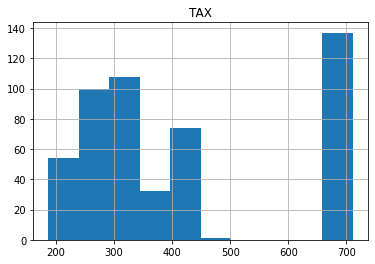

In [274]:
boston.hist('TAX')

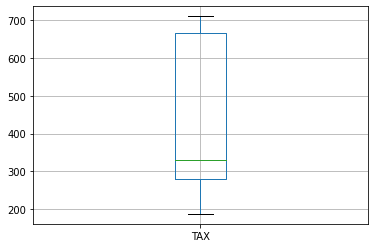

In [275]:
boston.boxplot('TAX')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b8fae4b10>]],
      dtype=object)

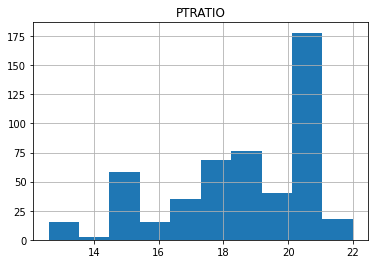

In [276]:
boston.hist('PTRATIO')

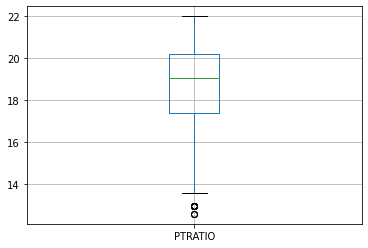

In [277]:
boston.boxplot('PTRATIO')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b8f9c6910>]],
      dtype=object)

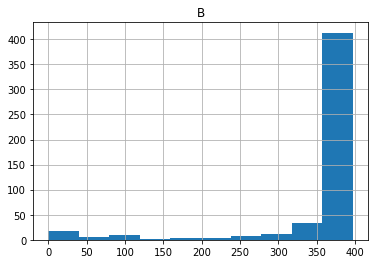

In [278]:
boston.hist('B')

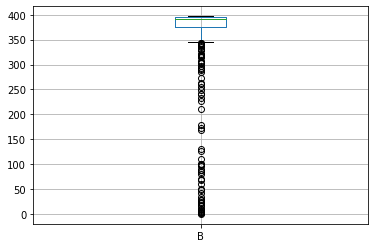

In [279]:
boston.boxplot('B')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b8f8d72d0>]],
      dtype=object)

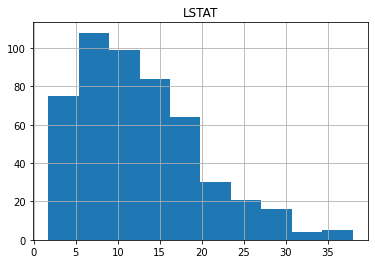

In [280]:
boston.hist('LSTAT')

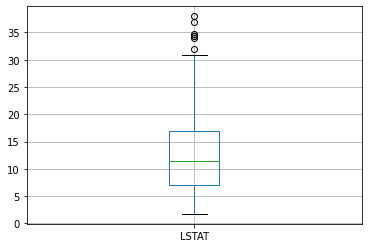

In [281]:
boston.boxplot('LSTAT')

In [282]:
corr_matrix = boston.corr()

In [283]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


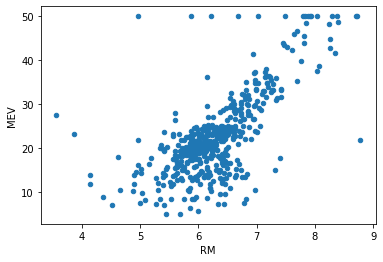

In [284]:
boston.plot(kind='scatter', x='RM', y='MEV')

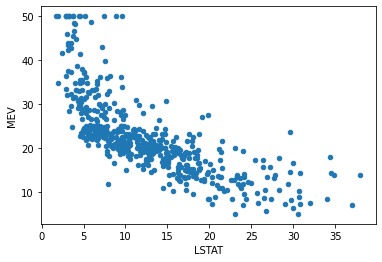

In [285]:
boston.plot(kind='scatter', x='LSTAT', y='MEV')

In [286]:
df = boston[['RM', 'LSTAT', 'MEV']]

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      506 non-null    float64
 1   LSTAT   506 non-null    float64
 2   MEV     506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


PREPARAÇÃO DOS DADOS 


In [288]:
df.rename(columns={'RM':'Room_Number', 'LSTAT': 'LSTAT(%)', 'MEV': 'MEDV'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [289]:
df.head()

,Room_Number,LSTAT(%),MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Room_Number  506 non-null    float64
 1   LSTAT(%)     506 non-null    float64
 2   MEDV         506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


In [291]:
df.tail()

,Room_Number,LSTAT(%),MEDV
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0
505,6.030,7.88,11.9


MODELAGEM

In [292]:
X = df[['Room_Number']]
Y = df['MEDV']

In [293]:
model = LinearRegression()

In [294]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1
)

In [295]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [296]:
model.coef_.round(2)

array([8.46])

In [297]:
model.intercept_.round(2)

-30.57

In [298]:
y_predict = model.predict(X_test)

In [299]:
y_predict.shape

(152,)

In [300]:
model.predict([[6.5]])

array([24.42606323])

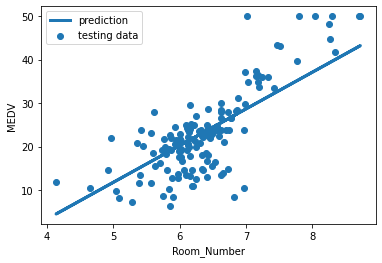

In [301]:
plt.scatter(X_test, Y_test, label='testing data');plt.plot(X_test, y_predict, label='prediction', linewidth=3)
plt.xlabel('Room_Number'); plt.ylabel('MEDV')
plt.legend(loc='upper left')

Text(0, 0.5, 'residuals')

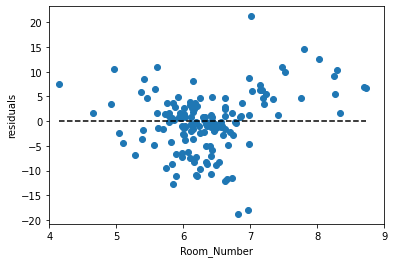

In [302]:
residuals = Y_test - y_predict
#plot residuals
plt.scatter(X_test, residuals)
#plot a horizontal line at y=0
plt.hlines(y=0, xmin= X_test.min(), xmax=X_test.max(), linestyle='--')
#set xlim
plt.xlim((4,9))
plt.xlabel('Room_Number'); plt.ylabel('residuals')

In [303]:
from sklearn.metrics import mean_squared_error

In [304]:
mean_squared_error(Y_test, y_predict)

36.517214730838624

In [305]:
model.score(X_test, Y_test)

0.6015774471545622

MODELAGEM SEGUNDA VARIÁVEL

In [306]:
X2 = df[['LSTAT(%)']]


In [307]:
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=1)

In [308]:
model2 = LinearRegression()

In [309]:
model2.fit(X2_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [310]:
model2.coef_.round(2)

array([-0.92])

In [311]:
model2.intercept_.round(2)

34.22

In [312]:
y2_predict = model2.predict(X2_test)

In [313]:
model2.predict([[6.5]])

array([28.26334144])

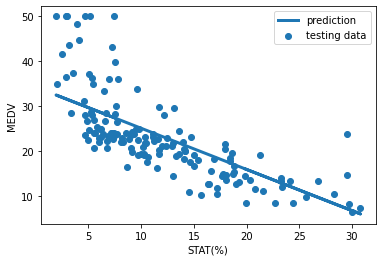

In [314]:
plt.scatter(X2_test, Y_test, label='testing data');plt.plot(X2_test, y2_predict, label='prediction', linewidth=3)
plt.xlabel('STAT(%)'); plt.ylabel('MEDV')
plt.legend(loc='upper right')

In [315]:
residuals2 = Y_test - y2_predict

Text(0, 0.5, 'residuals2')

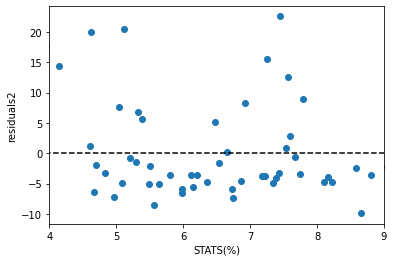

In [316]:
plt.scatter(X2_test, residuals2)
plt.hlines(y=0, xmin=X2_test.min(), xmax=X2_test.max(), linestyles='--')
plt.xlim((4,9))
plt.xlabel('STATS(%)'); plt.ylabel('residuals2')

In [317]:
mean_squared_error(Y_test, y2_predict)

42.62024347153971

In [318]:
model.score(X2_test, Y_test )

-69.00851158988645

MODELANDO AS DUAS VARIÁVEIS

In [319]:
X3 = df[['Room_Number', 'LSTAT(%)']]

In [320]:
X3_train, X3_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.3, random_state=1)

In [321]:
model3 = LinearRegression()

In [322]:
model3.fit(X3_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [323]:
model3.coef_.round(2)

array([ 4.13, -0.68])

In [324]:
model3.intercept_.round(2)

5.32

In [325]:
y3predict = model3.predict(X3_test)

In [326]:
y3predict.shape

(152,)

In [327]:
mean_squared_error(Y_test, y_predict)

36.517214730838624

In [328]:
model.score(X_test, Y_test)

0.6015774471545622

In [329]:
mean_squared_error(Y_test, y2_predict)

42.62024347153971

In [330]:
model2.score(X2_test, Y_test)

0.5349901044757204

In [331]:
mean_squared_error(Y_test, y3predict)

28.93449134108657

In [332]:
model3.score(X3_test, Y_test)

0.6843090583339465